In [84]:
import plot_tools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional plot style
# Using 'seaborn-v0_8-whitegrid' gives a clean background grid.
plt.style.use('seaborn-v0_8-notebook')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': (14, 8)
})

## Descriptive Stats

In [85]:
import pandas as pd

df = pd.read_feather(r"C:\\Working Papers\\Paper - Child Mortality and Climate Shocks\\Data\\Data_out\\DHSBirthsGlobal&ClimateShocks_v11_full.feather")

In [86]:
df[[col for col in df.columns if "agedeath" in col]]

c:\Users\abbat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\abbat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,child_agedeath,child_agedeath_1m3m,child_agedeath_3m6m,child_agedeath_6m9m,child_agedeath_9m12m,child_agedeath_12m15m,child_agedeath_1m6m,child_agedeath_6m12m,child_agedeath_12m18m,child_agedeath_18m24m,...,child_agedeath_30m36m,child_agedeath_2m3m,child_agedeath_3m7m,child_agedeath_1m,child_agedeath_2m,child_agedeath_3m,child_agedeath_4m,child_agedeath_5m,child_agedeath_6m,child_agedeath_alive
0,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
1,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
2,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
3,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
4,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436757,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
4436758,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
4436759,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000
4436760,1000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000


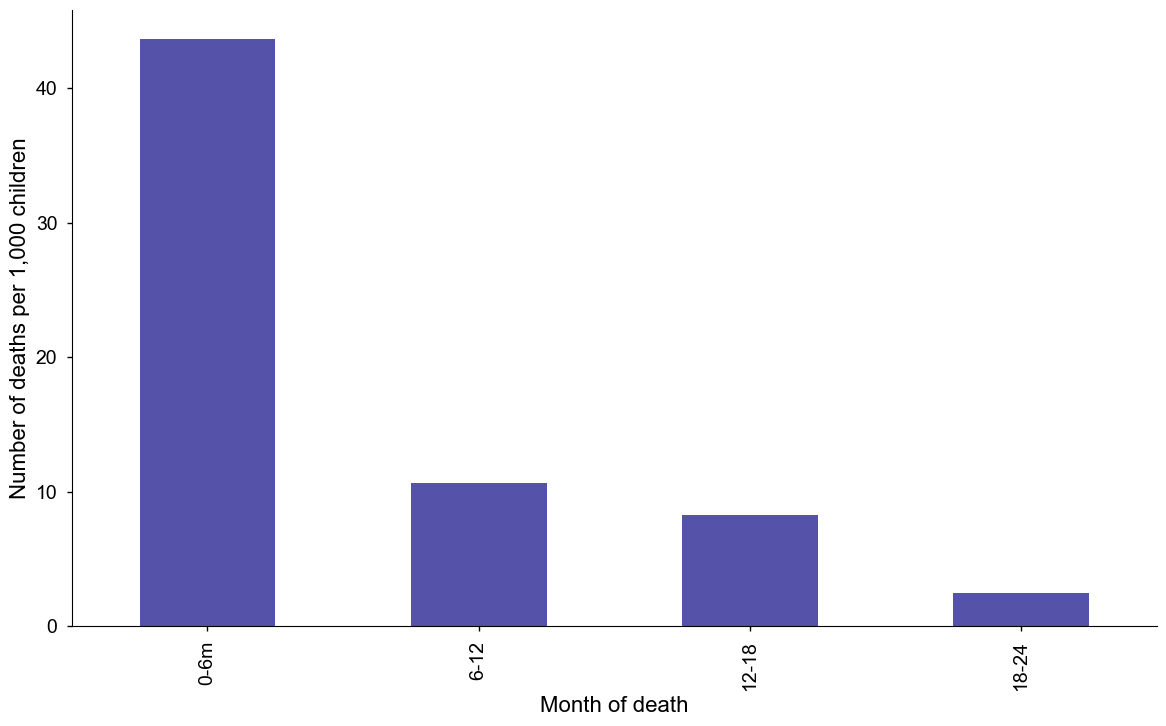

In [87]:
death_cols = ["child_agedeath_1m6m", "child_agedeath_6m12m", "child_agedeath_12m18m", "child_agedeath_18m24m"]#, "child_agedeath_24m30m", "child_agedeath_30m36m",]
death_labels = ["0-6m", "6-12", "12-18", "18-24"]#, "24-30", "30-36",]
d = dict(zip(death_cols, death_labels))

ax = df[death_cols].rename(columns=d).mean().plot(kind="bar", cmap="plasma", alpha=0.7)
ax.set_xlabel("Month of death")
ax.set_ylabel("Number of deaths per 1,000 children")

sns.despine()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\Deaths Distr.png", dpi=450, bbox_inches="tight")

In [88]:
# Keep cols from julia 
# [:child_fem, :child_mulbirth, :birth_order, :rural, :d_weatlh_ind_2, :d_weatlh_ind_3, :d_weatlh_ind_4, :d_weatlh_ind_5, :mother_ageb, :mother_ageb_squ, :mother_ageb_cub, :mother_eduy, :mother_eduy_squ, :mother_eduy_cub]
# 
indicators = ['spi1_born_12m18m_b_avg','stdm_t_born_12m18m_b_avg','stdm_t_born_18m24m_b_avg','spi1_born_18m24m_b_avg','stdm_t_inutero_b_avg','stdm_t_born_1m6m_b_avg','spi1_born_1m6m_b_avg','spi1_inutero_b_avg','spi1_born_6m12m_b_avg','stdm_t_born_6m12m_b_avg']
controls = ["child_fem", "child_mulbirth", "birth_order", "rural", "mother_ageb", "mother_eduy", "electricity", "pipedw"]
df = df[indicators + controls]

In [89]:
import pandas as pd
import numpy as np

stats = df[controls].astype(float).describe().T
stats = stats.rename(columns={
    'count': 'N', 
    'mean': 'Mean', 
    'std': 'SD', 
    'min': 'Min', 
    '25%': 'P25', 
    '50%': 'Median', 
    '75%': 'P75', 
    'max': 'Max'
})

# 3. Select specific columns if you don't want all of them (Optional)
# stats = stats[['N', 'Mean', 'SD', 'Min', 'Max']] 

# 4. Generate LaTeX
latex_code = stats.to_latex(
    index=True,
    float_format="{:0.2f}".format, # Format floats to 2 decimal places
    column_format="l" + "c" * len(stats.columns), # Left align index, center align numbers
    caption="Descriptive Statistics of Control Variables",
    label="tab:summary_stats",
    position="h"
)

# Add booktabs (standard for nice tables) usually requires manual replacement 
# or setting specific pandas options, but a quick replace works well:
latex_code = latex_code.replace('\\toprule', '\\toprule\n & ' + ' & '.join(stats.columns) + ' \\\\ \\midrule')

with open("C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\summary_stats.tex", "w") as f:
    f.write(latex_code)

print("File 'summary_stats.tex' created successfully.")

<>:33: SyntaxWarning: invalid escape sequence '\W'
<>:33: SyntaxWarning: invalid escape sequence '\W'
C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1849617274.py:33: SyntaxWarning: invalid escape sequence '\W'
  with open("C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\summary_stats.tex", "w") as f:


File 'summary_stats.tex' created successfully.


C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\2217867848.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("plasma_r", len(keys) + 1)
c:\Users\abbat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\Users\abbat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\abbat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
c:\Users\abbat\AppData\Local\Programs\Python\Python313\Lib\sit

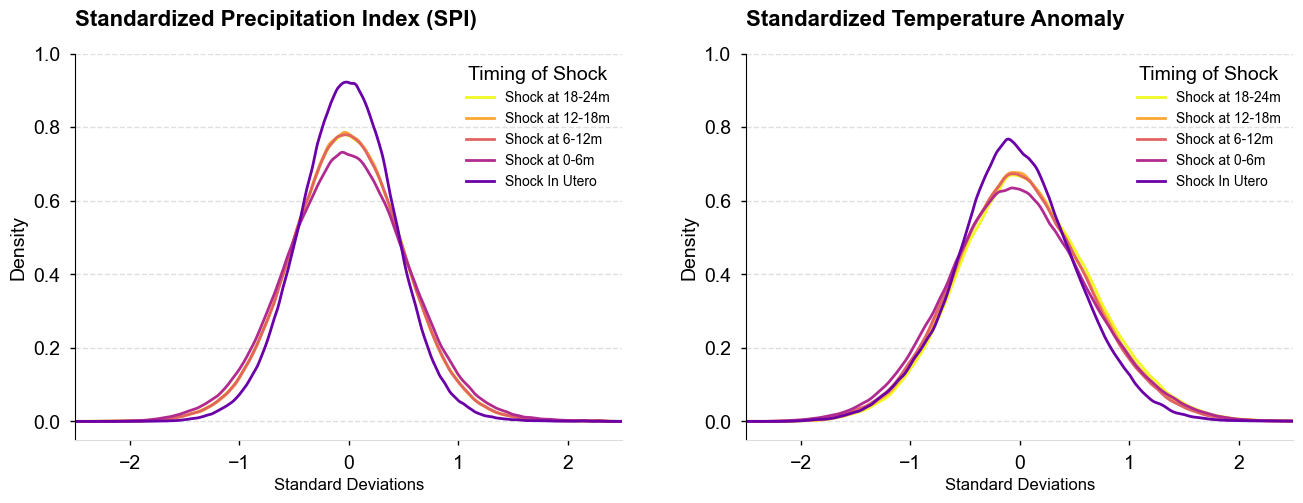

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_modern_histograms(df, labels_dict):
    """
    Plots KDEs of shock variables in a style matching the coefficient plots.
    Separates variables into two subplots based on keys (SPI vs STDM).
    """
    
    # 1. Separate keys into two groups (Precipitation vs Temperature)
    # Assuming 'spi1' is precip and 'stdm' is temp based on your keys
    spi_keys = [k for k in labels_dict.keys() if 'spi1' in k][::-1]
    temp_keys = [k for k in labels_dict.keys() if 'stdm' in k][::-1]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
    
    # Define the groups to iterate over
    # (Label for Title, List of Keys, Axis Object)
    plot_groups = [
        ("Standardized Precipitation Index (SPI)", spi_keys, axs[0]),
        ("Standardized Temperature Anomaly", temp_keys, axs[1])
    ]

    for title, keys, ax in plot_groups:
        # Setup Colors: plasma map to match your other plots
        # Use len(keys) + 1 to ensure the lightest yellow isn't too hard to see
        colors = plt.cm.get_cmap("plasma_r", len(keys) + 1)
        
        for i, key in enumerate(keys):
            # Label lookup
            label_text = labels_dict.get(key, key)
            color = colors(i)
            
            # Sample data for performance (optional, based on your original code)
            s = df[key].dropna()

            # Plot KDE
            # lw=2 makes the lines pop more like the coefficient plot markers
            s.plot(kind="kde", color=color, label=label_text, ax=ax, linewidth=2)

            if (label_text=='Shock In Utero' )|(label_text=='Shock at 0-6m'):

                # Compute thresholds
                std = s.std()
                mean = s.mean()
                positive = mean + std
                negative = mean - std

                # Plot Vertical Lines (Thresholds)
                # We make these slightly transparent (alpha=0.6) and dashed 
                # so they don't overpower the main distribution lines.
                ax.axvline(positive, color=color, linestyle="--", alpha=0.8, linewidth=1)
                ax.axvline(negative, color=color, linestyle="--", alpha=0.8, linewidth=1)
                
                # Mean line (Zero)
                # ax.axvline(0, color=color, linestyle="-", alpha=0.3, linewidth=0.5)

        # --- Apply Modern Styling (Matching create_coefficient_plot) ---
        
        # 1. Title: Bold and Left Aligned
        ax.set_title(title, pad=20, loc='left', weight='bold', fontsize=16)
        
        # 2. Spines: Remove Top, Right, and Bottom (keep Left colored)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True) # Kept bottom for X-axis readability
        ax.spines['bottom'].set_color('#DDDDDD') # Make bottom spine subtle
        ax.spines['left'].set_color('black')
        
        # 3. Grid: Y-axis only, dashed, transparent
        ax.grid(axis='y', alpha=0.4, linestyle='--')
        ax.grid(axis='x', alpha=0)
        
        # 4. Labels and Limits
        ax.set_ylabel("Density", fontsize=14)
        ax.set_xlabel("Standard Deviations", fontsize=12)
        ax.set_xlim(-2.5, 2.5) # Slightly wider to let tails breathe
        ax.set_ylim(-0.05, 1) # Adjust based on your data density
        
        # 5. Legend: No frame, aligned upper right (or best)
        # We reverse handles/labels so the legend order matches the visual stacking if needed,
        # but standard order is usually fine here.
        ax.legend(title='Timing of Shock', loc='upper right', frameon=False, fontsize=10)

    fig.tight_layout(pad=3)
    
    # Optional: Global title if needed
    # fig.suptitle("Distribution of Climate Shocks", weight='bold', fontsize=18, y=1.05)
    
    return fig

# --- Usage ---

# Define your dictionary
labels = {
    'spi1_inutero_b_avg': 'Shock In Utero', 
    'spi1_born_1m6m_b_avg':   'Shock at 0-6m', 
    'spi1_born_6m12m_b_avg':  'Shock at 6-12m', 
    'spi1_born_12m18m_b_avg': 'Shock at 12-18m', 
    'spi1_born_18m24m_b_avg': 'Shock at 18-24m', 
    # 'spi1_born_24m30m_b_avg': 'Shock at 24-32m', 
    # 'spi1_born_30m36m_b_avg': 'Shock at 32-36m',
    'stdm_t_inutero_b_avg': 'Shock In Utero', 
    'stdm_t_born_1m6m_b_avg':   'Shock at 0-6m', 
    'stdm_t_born_6m12m_b_avg':  'Shock at 6-12m', 
    'stdm_t_born_12m18m_b_avg': 'Shock at 12-18m', 
    'stdm_t_born_18m24m_b_avg': 'Shock at 18-24m', 
    # 'stdm_t_born_24m30m_b_avg': 'Shock at 24-32m', 
    # 'stdm_t_born_30m36m_b_avg': 'Shock at 32-36m',
}

# Assuming 'df' is your DataFrame loaded in memory
fig = plot_modern_histograms(df, labels)
plt.show()

## Spline

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def distribute_x_values(x_base, n_groups, margin=0.2):
    """
    Helper to offset x-values so error bars don't overlap.
    """
    offsets = np.linspace(-margin, margin, n_groups)
    return [x_base + off for off in offsets]

def highlight_significant_points(ax, x, y, lower, upper, color):
    """
    Adds a diamond marker if the Confidence Interval does not cross zero.
    """
    for i, (xi, yi, l, u) in enumerate(zip(x, y, lower, upper)):
        # Check if significant (CI does not contain 0) -> signs match
        if (l * u) > 0:
            ax.plot(xi, yi, marker='D', color=color, markersize=7, zorder=10, linestyle='None')

def plot_spline_coefficients(
        data, shock, spi, temp, stat,
        canvas_size, time_frames, title_labels, x_tick_labels, 
        xlim, ylim=(-0.8, 1.5), legend_pos=(1.05, 1),
        margin=0.2,
        # Defaulting to 4 colors from Plasma to match previous style
        colors=None, 
        labels=None,
        outpath=None,
    ):
    
    # 1. Setup Data
    data_to_plot = data.get(shock, {}).get("cell1", {})
    if not data_to_plot:
        print(f"Warning: No spline data found for shock '{shock}'. Skipping plot.")
        return

    # 2. Modern Defaults (if not provided)
    spline_cats = ['q4_int', 'q3_int', 'q2_int', 'q1_int']
    
    if colors is None or len(colors) < 4:
        # Use Plasma colormap consistent with previous chart
        cmap = plt.cm.get_cmap("plasma", 5)
        # We pick 4 distinct colors from the map
        colors = [cmap(0), cmap(1), cmap(2), cmap(3)]
        
    if labels is None or len(labels) < 4:
        labels = [
            "Large Positive Shock (4st Q)", 
            "Moderate Positive Shock (3rd Q)", 
            "Moderate Negative Shock (2nd Q)", 
            "Large Negative Shock (1st Q)"
        ]

    # 3. Create Figure
    n_rows, n_cols = canvas_size
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
    flat_axs = axs.flatten()
    xvalues_clean = np.arange(len(x_tick_labels))

    # 4. Plot Loop
    for i, ax in enumerate(flat_axs):
        # Handle empty subplots
        if i >= len(time_frames) or time_frames[i] is None:
            ax.axis('off')
            continue

        timeframe_key_base = time_frames[i]
        
        # Calculate offsets for the 4 groups
        x_all_groups = distribute_x_values(xvalues_clean, len(spline_cats), margin=margin)

        for j, cat_suffix in enumerate(spline_cats):
            full_data_key = f"{timeframe_key_base}_{stat}_{cat_suffix}"
            plotdata = data_to_plot.get(full_data_key)
            print(full_data_key, plotdata)
            if not plotdata: continue

            # Extract Data
            coefs = np.array(plotdata["coef"][:len(x_tick_labels)])
            se = np.array(plotdata["se"][:len(x_tick_labels)]) # Assuming SE is available to calc CI
            
            # Or if your data already has lower/upper:
            # lower = np.array(plotdata["lower"][:len(x_tick_labels)])
            # upper = np.array(plotdata["upper"][:len(x_tick_labels)])
            
            # 1. Calculate Original Bounds
            orig_lower = coefs - 1.96 * se
            orig_upper = coefs + 1.96 * se

            # 2. FLIP LOGIC (Corrected)
            # If we invert the coefficient (negative shocks), we must invert the bounds
            # The original upper bound becomes the new lower bound (times -1)
            if "q1" in cat_suffix or "q2" in cat_suffix:
                coefs = coefs * -1
                lower = -1 * orig_upper
                upper = -1 * orig_lower
            else:
                coefs = coefs
                lower = orig_lower
                upper = orig_upper
                
            # Error Bar Calculation
            yerr = [coefs - lower, upper - coefs]
            xvalues = x_all_groups[j]
            
            # --- PLOT: Error Bars (Modern Style) ---
            ax.errorbar(
                xvalues, coefs, yerr=yerr, 
                fmt="o",                 # Circle marker for estimate
                markersize=5, 
                linewidth=1.5,           # Thicker line
                elinewidth=1.5,          # Thicker error bar
                capsize=0,               # No caps (cleaner look)
                label=labels[j] if i == 0 else "", # Legend only once (or handle later)
                color=colors[j],
                alpha=0.9
            )
            
            # --- PLOT: Significance Diamonds ---
            highlight_significant_points(ax, xvalues, coefs, lower, upper, colors[j])

        # --- STYLING (Modern) ---
        
        # 1. Title: Bold, Left Aligned
        title_text = title_labels.get(timeframe_key_base, "")
        ax.set_title(title_text, pad=15, loc='left', weight='bold', fontsize=14)
        
        # 2. Reference Line
        ax.axhline(y=0, color="black", linewidth=1, alpha=0.8)
        
        # 3. Spines: Remove Top/Right, make Bottom subtle
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.spines['left'].set_color('black')
        
        # 4. Grid: Y-axis only, dashed
        ax.grid(axis='y', alpha=0.4, linestyle='--')
        ax.grid(axis='x', alpha=0)
        
        # 5. Ticks & Limits
        ax.set_xticks(xvalues_clean)
        ax.set_xticklabels(x_tick_labels, fontsize=10)
        ax.set_xlim(xlim)
        if ylim: 
            ax.set_ylim(ylim)
        ax.set_ylabel("Coefficient Impact", fontsize=10)

    # 5. Legend & Saving
    # Use the handles from the first valid subplot for the global legend
    handles, labels_legend = flat_axs[0].get_legend_handles_labels()
    fig.legend(handles, labels_legend, loc='upper center', bbox_to_anchor=(0.5, 0.05), 
               ncol=4, frameon=False, fontsize=11)

    fig.tight_layout(rect=[0, 0.08, 1, 1]) # Leave room at bottom for legend
    
    if outpath:
        filename = fr"{outpath}\{shock}_spline_{spi}_{stat}_{temp}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved: {filename}")
    
    plt.show() # Display inline if running in notebook

In [92]:
import numpy as np

def to_float(s):
    """
    Converts a string to a float. 
    Handles LaTeX symbols like stars (*), parens (), and empty strings.
    Returns np.nan for empty/missing cells.
    """
    if s is None:
        return np.nan
    
    # Remove standard LaTeX noise
    clean = s.replace("*", "").replace("(", "").replace(")", "").replace("\\", "").strip()
    
    if not clean:
        return np.nan
        
    try:
        return float(clean)
    except ValueError:
        return np.nan

def compute_ci(coefs, ses):
    """
    Computes 95% Confidence Intervals (Coef +/- 1.96 * SE).
    Handles NaNs gracefully.
    """
    lower = []
    upper = []
    for c, s in zip(coefs, ses):
        if np.isnan(c) or np.isnan(s):
            lower.append(np.nan)
            upper.append(np.nan)
        else:
            lower.append(c - 1.96 * s)
            upper.append(c + 1.96 * s)
    return lower, upper

def extract_spline(file_path):
    """
    Extracts spline coefficients and their 95% CI bounds from the new LaTeX table format.
    
    Structure:
      - Reads rows starting with 'spi1_' or 'stdm_t_'.
      - Parses the quantile interactions (q4, q3, q2, q1).
      - Handles empty cells (missing values) in the LaTeX table.
      - Separates data into Cell 1 (Standard FE), Cell 2, and Cell 3 based on column order.
    
    Returns:
      dict: {
        "spi":  { "cell1": {key: {coef, se, lower, upper}}, "cell2": ..., "cell3": ... },
        "temp": { "cell1": {key: {coef, se, lower, upper}}, "cell2": ..., "cell3": ... }
      }
    """
    
    results = {
        "spi":  {"cell1": {}, "cell2": {}, "cell3": {}},
        "temp": {"cell1": {}, "cell2": {}, "cell3": {}}
    }
    
    # Prefixes to identify relevant rows
    valid_spis = ("spi1_", "spi3_", "spi6_", "spi9_", "spi12_")
    valid_temps = ("stdm_t_", "std_t_")
    
    with open(file_path, "r") as file:
        lines = file.readlines()

    for i, line in enumerate(lines):
        line = line.strip()
        
        # 1. Clean LaTeX formatting to check start of string
        # Replace escaped underscore with normal underscore for checking
        clean_line_start = line.replace(r"\_", "_")
        
        # 2. Skip irrelevant lines (headers, footer, control variables)
        if not (clean_line_start.startswith(valid_spis) or clean_line_start.startswith(valid_temps)):
            continue

        # 3. Identify Variable and Key
        # Split by '&' first to separate the variable name from data
        tokens = [t.replace(r"\\", "").strip() for t in line.split("&")]
        
        raw_var_name = tokens[0].replace(r"\_", "_") # Clean var name e.g., "spi1_inutero_b_avg_q4_int"
        
        # Determine if it is SPI or Temp and strip prefix to make the key
        category = None
        key = raw_var_name
        
        if raw_var_name.startswith(valid_spis):
            category = "spi"
            # Remove prefix (e.g. spi1_)
            # Find the first underscore after the prefix logic (simplified split here)
            parts = raw_var_name.split("_", 1) 
            if len(parts) > 1: key = parts[1]
                
        elif raw_var_name.startswith(valid_temps):
            category = "temp"
            # Handle stdm_t_ vs std_t_
            if raw_var_name.startswith("stdm_t_"):
                key = raw_var_name.replace("stdm_t_", "")
            elif raw_var_name.startswith("std_t_"):
                key = raw_var_name.replace("std_t_", "")

        # 4. Extract Coefficients (Current Line)
        # tokens[1:] are the data columns. 
        # Note: tokens might be empty strings if the latex table has "& &"
        raw_coefs = tokens[1:]
        
        # 5. Extract Standard Errors (Next Line)
        err_line = lines[i + 1].strip()
        err_tokens = [t.replace(r"\\", "").strip() for t in err_line.split("&")]
        raw_ses = err_tokens[1:]
        
        # Ensure lengths match
        if len(raw_coefs) != len(raw_ses):
            print(f"Warning: Mismatch in Coef/SE count for {key}. Skipping.")
            continue

        # 6. Parse numbers
        coefs_all = [to_float(x) for x in raw_coefs]
        ses_all   = [to_float(x) for x in raw_ses]
        
        # 7. Split into Cells (1, 2, 3) using slicing
        # The table has triplets: (Cell1, Cell2, Cell3) repeated for each age group.
        # Indices: 0, 3, 6... -> Cell 1
        # Indices: 1, 4, 7... -> Cell 2
        # Indices: 2, 5, 8... -> Cell 3
        
        cells_map = {
            "cell1": (coefs_all[0::3], ses_all[0::3]),
            "cell2": (coefs_all[1::3], ses_all[1::3]),
            "cell3": (coefs_all[2::3], ses_all[2::3]),
        }

        # 8. Store Data
        for cell_name, (c_vals, s_vals) in cells_map.items():
            lower, upper = compute_ci(c_vals, s_vals)
            
            results[category][cell_name][key] = {
                "coef": c_vals,
                "se": s_vals,
                "lower": lower,
                "upper": upper
            }

    return results

inutero_b_avg_q4_int {'coef': [1.325, 0.121, 0.486, 0.053, 0.256, -0.005], 'se': [0.42, 0.198, 0.175, 0.103, 0.172, 0.009], 'lower': [0.5018, -0.26708000000000004, 0.14300000000000002, -0.14887999999999998, -0.08111999999999997, -0.02264], 'upper': [2.1482, 0.50908, 0.829, 0.25488, 0.59312, 0.012639999999999998]}
inutero_b_avg_q3_int {'coef': [-0.312, -0.696, 0.395, 0.382, 0.145, -0.063], 'se': [1.621, 0.807, 0.723, 0.394, 0.674, 0.041], 'lower': [-3.4891599999999996, -2.27772, -1.0220799999999999, -0.39024000000000003, -1.17604, -0.14336], 'upper': [2.86516, 0.8857200000000001, 1.81208, 1.1542400000000002, 1.46604, 0.01736]}
inutero_b_avg_q2_int {'coef': [-0.634, -0.528, -1.441, 0.106, -0.2, 0.064], 'se': [1.276, 0.646, 0.573, 0.314, 0.546, 0.029], 'lower': [-3.13496, -1.79416, -2.5640799999999997, -0.50944, -1.27016, 0.00716], 'upper': [1.8669600000000002, 0.7381599999999999, -0.3179200000000002, 0.72144, 0.87016, 0.12084]}
inutero_b_avg_q1_int {'coef': [-1.51, -0.637, -0.573, -0.201

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\3680383215.py:4: SyntaxWarning: invalid escape sequence '\W'
  OUTPUTS = "C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs"


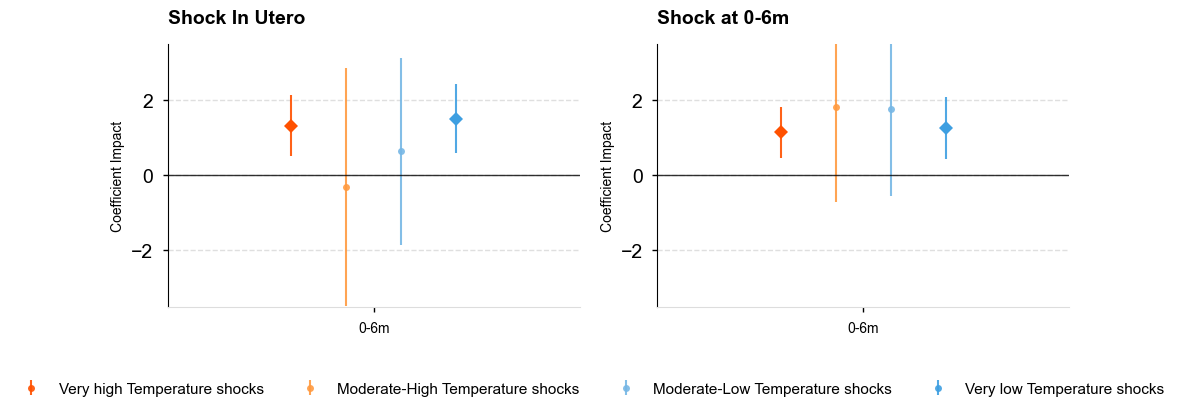

inutero_b_avg_q4_int {'coef': [1.044, 0.048, -0.065, -0.015, 0.193, 0.016], 'se': [0.579, 0.287, 0.26, 0.144, 0.244, 0.015], 'lower': [-0.09083999999999981, -0.5145199999999999, -0.5746, -0.29724, -0.28524, -0.013399999999999999], 'upper': [2.17884, 0.61052, 0.44460000000000005, 0.26724, 0.6712400000000001, 0.045399999999999996]}
inutero_b_avg_q3_int {'coef': [0.595, 0.135, -0.118, 1.117, 0.306, 0.044], 'se': [1.955, 0.968, 0.868, 0.486, 0.801, 0.043], 'lower': [-3.2367999999999997, -1.7622799999999998, -1.81928, 0.16444000000000003, -1.26396, -0.040279999999999996], 'upper': [4.4268, 2.03228, 1.5832799999999998, 2.06956, 1.87596, 0.12828]}
inutero_b_avg_q2_int {'coef': [0.018, -0.849, -0.625, -0.043, -0.235, 0.003], 'se': [1.716, 0.897, 0.797, 0.443, 0.749, 0.045], 'lower': [-3.34536, -2.60712, -2.18712, -0.91128, -1.70304, -0.0852], 'upper': [3.3813599999999995, 0.9091199999999999, 0.93712, 0.8252799999999999, 1.23304, 0.0912]}
inutero_b_avg_q1_int {'coef': [0.166, -0.379, -0.28, -0.

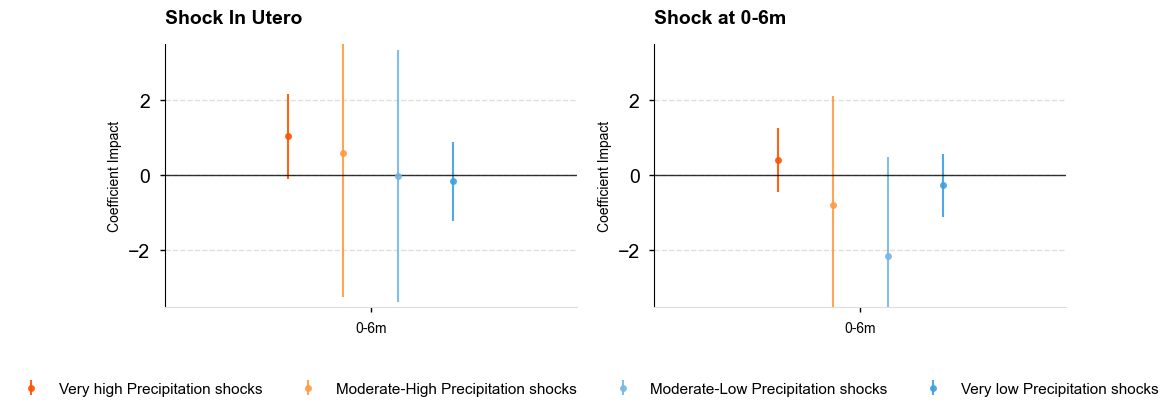

In [93]:
spi = "spi1"
temp = "stdm_t"
stat = "avg"
OUTPUTS = "C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs"
OUT_FIGS = rf"{OUTPUTS}\Figures"
file_path = rf"{OUTPUTS}\spline_dummies_false_spi1_b_avg_stdm_t semester - spthreshold1 standard_fe standard_sym.tex"  # Replace with the actual path to your LaTeX file.
outdata = extract_spline(file_path)

time_frames = [
    'inutero_b', 
    'born_1m6m_b',
    'born_6m12m_b',
]
title_labels = {
    'inutero_b': 'Shock In Utero',
    'born_1m6m_b': 'Shock at 0-6m',
    'born_6m12m_b': 'Shock at 6-12m',
    'born_12m18m_b': 'Shock at 12-18m',
    'born_18m24m_b': 'Shock at 18-24m',
    # 'born_24m30m_b': 'Shock at 24-30m',
    # 'born_30m36m_b': 'Shock at 30-36m'
}
x_tick_labels = ['0-6m']#, '6-12m', '12-18m', '18-24m', '24-30m', '30-36m']
xlim = (-0.5, len(x_tick_labels) - 0.5)

plot_spline_coefficients(
    data=outdata, 
    shock="temp",
    spi=spi,
    temp=temp,
    stat=stat,
    canvas_size = (1, 2),
    time_frames=time_frames,
    title_labels=title_labels,
    x_tick_labels=x_tick_labels,
    xlim=xlim,
    ylim=(-3.5,3.5),
    margin=0.2,
    colors = [
        "#ff5100",  # Very high temperature
        "#ff9a40",  # High temperature
        "#76b7e5",  # Low temperature
        "#3e9fe1",   # Very low temperature
    ],
    labels=[
        "Very high Temperature shocks", 
        "Moderate-High Temperature shocks",
        "Moderate-Low Temperature shocks", 
        "Very low Temperature shocks",
    ],
    outpath=rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg"
)

plot_spline_coefficients(
    data=outdata, 
    shock="spi",
    spi=spi,
    temp=temp,
    stat=stat,
    canvas_size = (1, 2),
    time_frames=time_frames,
    title_labels=title_labels,
    x_tick_labels=x_tick_labels,
    xlim=xlim,
    ylim=(-3.5,3.5),
    margin=0.2,
    colors = [
        "#ff5100",  # Very high temperature
        "#ff9a40",  # High temperature
        "#76b7e5",  # Low temperature
        "#3e9fe1",   # Very low temperature
    ],
    labels=[
        "Very high Precipitation shocks", 
        "Moderate-High Precipitation shocks",
        "Moderate-Low Precipitation shocks", 
        "Very low Precipitation shocks",
    ],
    outpath=rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg"
)


In [94]:
import matplotlib.pyplot as plt
import numpy as np

# --- Helper Functions ---

def distribute_x_values(x_base, n_groups, margin=0.2):
    """Offset x-values so error bars don't overlap."""
    offsets = np.linspace(-margin, margin, n_groups)
    return [x_base + off for off in offsets]

def highlight_significant_points(ax, x, y, lower, upper, color):
    """Adds a diamond marker if the Confidence Interval does not cross zero."""
    for i, (xi, yi, l, u) in enumerate(zip(x, y, lower, upper)):
        if np.isnan(l) or np.isnan(u): continue
        # Significant if Lower and Upper bounds share the same sign
        if (l * u) > 0:
            ax.plot(xi, yi, marker='D', color=color, markersize=5, zorder=10, linestyle='None')

# --- Main Plotting Function ---

def plot_spline_coefficients_all(
        data_dict, 
        shock_type,  # 'spi' or 'temp'
        time_frames, # List of prefixes, e.g., ['inutero_b_avg', 'born_1m6m_b_avg']
        title_labels,
        x_tick_labels, 
        canvas_size=(1, 2),
        xlim=None, 
        ylim=None,
        colors=None, 
        labels=None,
        outpath=None
    ):
    
    # 1. Access the specific Cell Data (Defaulting to 'cell1' based on your data)
    data_to_plot = data_dict.get(shock_type, {}).get("cell1", {})
    
    if not data_to_plot:
        print(f"Error: No data found for shock '{shock_type}' in 'cell1'.")
        return

    # 2. Defaults
    spline_cats = ['q4_int', 'q3_int', 'q2_int', 'q1_int']
    
    if colors is None:
        # Plasma-like colors
        colors = ["#0d0887", "#cc4778", "#fdc086", "#f0f921"] 
        
    if labels is None:
        labels = [
            "Q4: Large Positive Shock", 
            "Q3: Moderate Positive Shock", 
            "Q2: Moderate Negative Shock", 
            "Q1: Large Negative Shock"
        ]

    # 3. Create Figure
    n_rows, n_cols = canvas_size
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), squeeze=False)
    flat_axs = axs.flatten()
    
    xvalues_clean = np.arange(len(x_tick_labels))
    if xlim is None:
        xlim = (-0.5, len(x_tick_labels) - 0.5)

    # 4. Plot Loop
    for i, ax in enumerate(flat_axs):
        if i >= len(time_frames) or time_frames[i] is None:
            ax.axis('off')
            continue

        timeframe_key = time_frames[i]
        
        # Calculate offsets
        x_all_groups = distribute_x_values(xvalues_clean, len(spline_cats), margin=0.2)

        for j, cat_suffix in enumerate(spline_cats):
            # Construct key: e.g., "inutero_b_avg" + "_" + "q4_int"
            # Note: Your dictionary keys don't seem to have a 'stat' middle part based on the dump
            # so we join directly.
            full_data_key = f"{timeframe_key}_{cat_suffix}"
            
            plotdata = data_to_plot.get(full_data_key)
            
            if not plotdata: 
                # Try adding the stat if the direct join failed (optional fallback)
                # full_data_key = f"{timeframe_key}_b_avg_{cat_suffix}"
                # plotdata = data_to_plot.get(full_data_key)
                if not plotdata:
                    continue

            # --- EXTRACT DATA ---
            # Use data up to the length of x_tick_labels
            n_ticks = len(x_tick_labels)
            
            # Handle NaNs naturally by converting to numpy float arrays
            coefs = np.array(plotdata["coef"][:n_ticks], dtype=float)
            se = np.array(plotdata["se"][:n_ticks], dtype=float)
            
            # Reconstruct CI to ensure consistency
            orig_lower = coefs - 1.96 * se
            orig_upper = coefs + 1.96 * se

            # --- FLIP LOGIC for Negative Shocks (Q1/Q2) ---
            # If we flip the coefficient, we must swap and flip bounds 
            # so that Lower is still < Upper
            if "q1" in cat_suffix or "q2" in cat_suffix:
                final_coefs = coefs * -1
                final_lower = -1 * orig_upper
                final_upper = -1 * orig_lower
            else:
                final_coefs = coefs
                final_lower = orig_lower
                final_upper = orig_upper
                
            # Calculate error bar lengths (must be positive)
            # We treat NaNs as 0 length for the calculation to avoid errors, 
            # Matplotlib will mask the point anyway if coef is NaN.
            err_low = final_coefs - final_lower
            err_high = final_upper - final_coefs
            
            # Replace NaN errors with 0 just for the yerr array construction
            # (The point won't plot if x/y is nan, but yerr validation happens first)
            yerr = [np.nan_to_num(err_low), np.nan_to_num(err_high)]
            
            xvalues = x_all_groups[j]
            
            # --- PLOT ---
            ax.errorbar(
                xvalues, final_coefs, yerr=yerr, 
                fmt="o", markersize=5, linewidth=1.5, elinewidth=1.5, capsize=0,
                label=labels[j] if i == 0 else "", 
                color=colors[j], alpha=0.9
            )
            
            highlight_significant_points(ax, xvalues, final_coefs, final_lower, final_upper, colors[j])

        # --- STYLING ---
        title_text = title_labels.get(timeframe_key, timeframe_key)
        ax.set_title(title_text, pad=15, loc='left', weight='bold', fontsize=14)
        ax.axhline(y=0, color="black", linewidth=1, alpha=0.8)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.spines['left'].set_color('black')
        
        ax.grid(axis='y', alpha=0.4, linestyle='--')
        ax.grid(axis='x', alpha=0)
        
        ax.set_xticks(xvalues_clean)
        ax.set_xticklabels(x_tick_labels, fontsize=10)
        ax.set_xlim(xlim)
        if ylim: ax.set_ylim(ylim)
        ax.set_ylabel("Coefficient Impact", fontsize=10)

    # 5. Global Legend
    handles, labels_legend = flat_axs[0].get_legend_handles_labels()
    fig.legend(handles, labels_legend, loc='upper center', bbox_to_anchor=(0.5, 0.05), 
               ncol=4, frameon=False, fontsize=11)

    fig.tight_layout(rect=[0, 0.08, 1, 1])
    
    if outpath:
        filename = f"{outpath}/{shock_type}_spline_plot.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved: {filename}")
    
    plt.show()

Plotting SPI...
Saved: C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures/spi_spline_plot.png


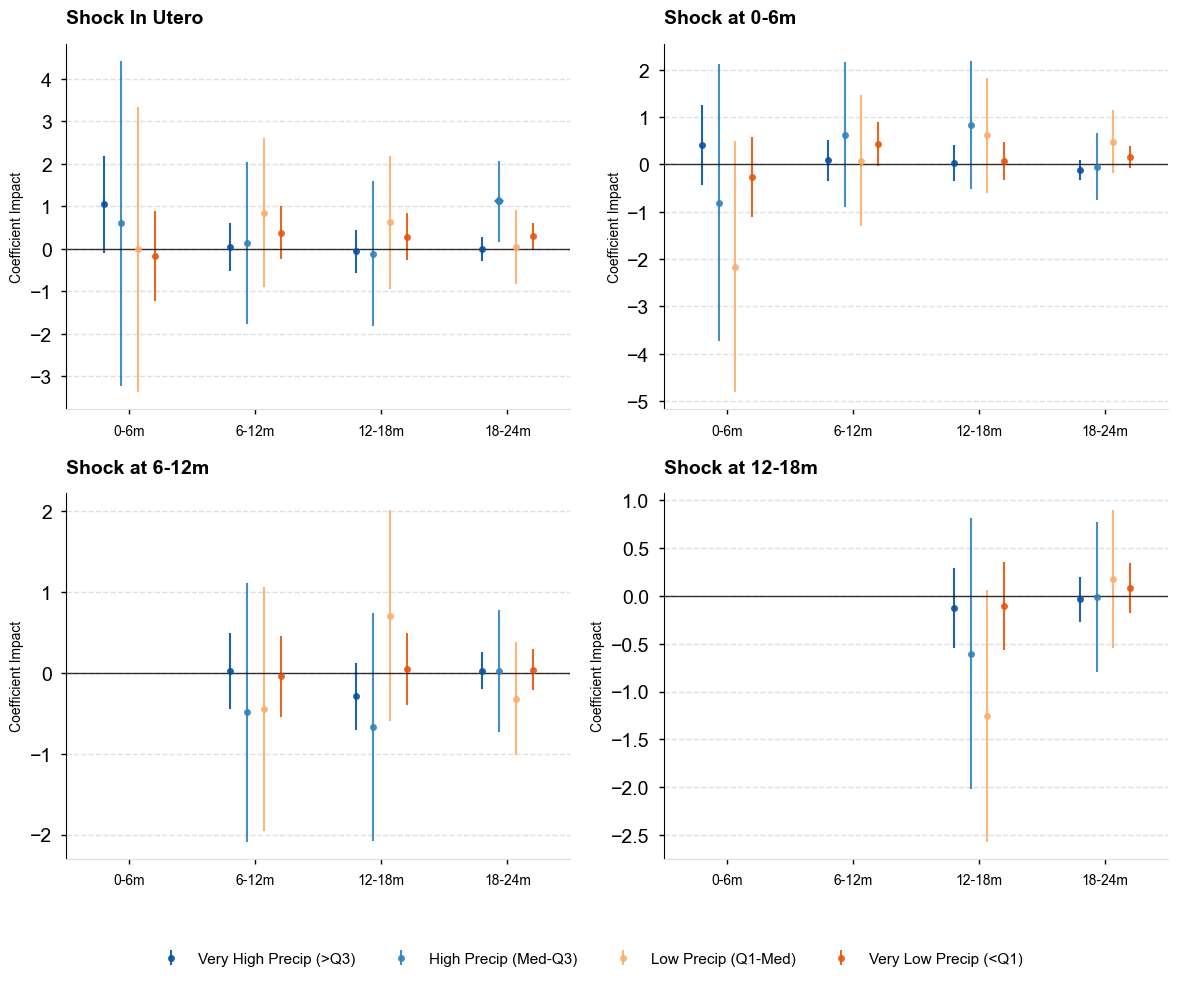

Plotting Temperature...
Saved: C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures/temp_spline_plot.png


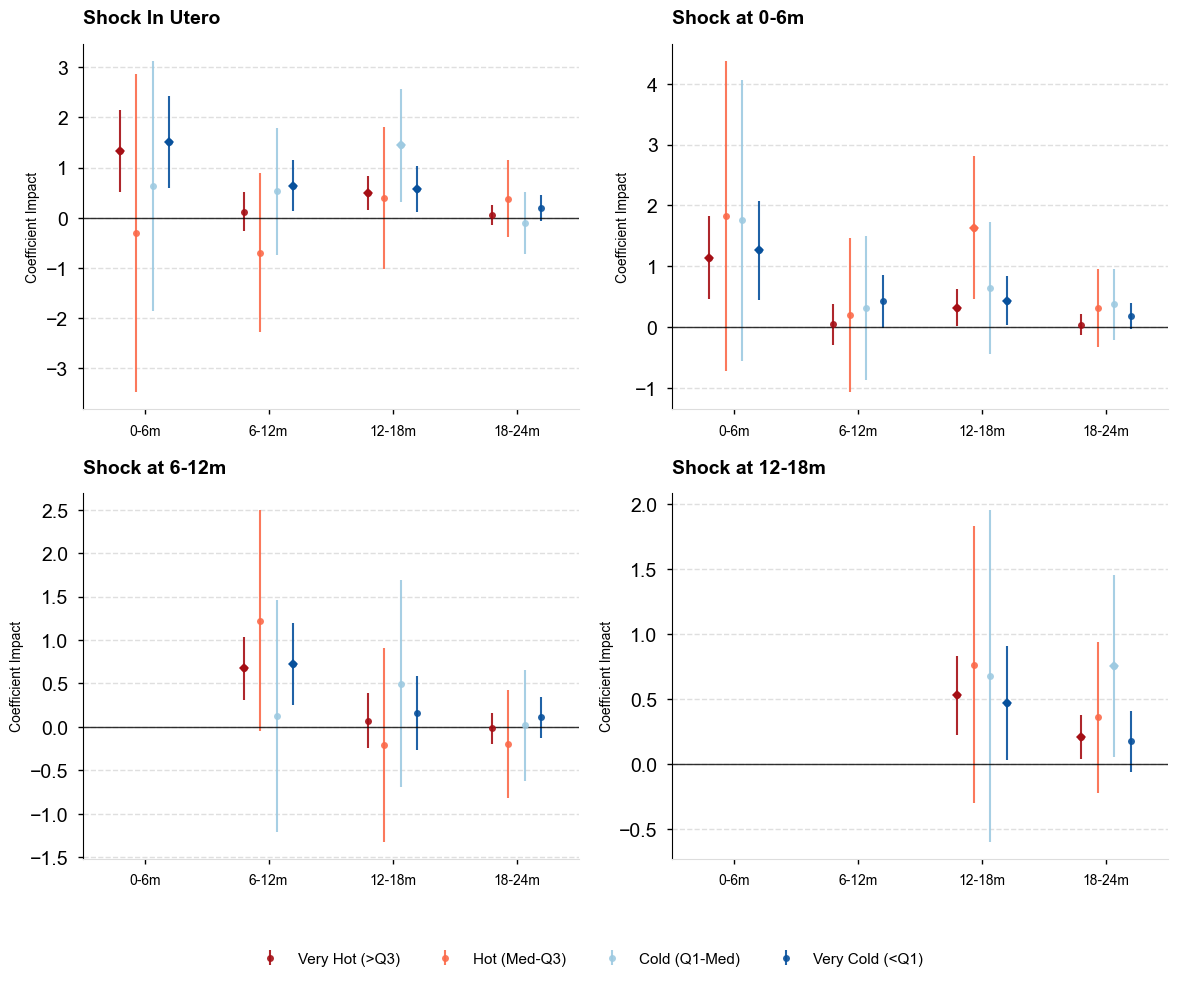

In [95]:
# --- Configuration ---
time_frames_to_plot = [
    'inutero_b_avg', 
    'born_1m6m_b_avg',
    'born_6m12m_b_avg',
    'born_12m18m_b_avg',
    'born_18m24m_b_avg',
    'born_24m30m_b_avg'
]

# 2. Define Titles for each frame
titles = {
    'inutero_b_avg':      'Shock In Utero', 
    'born_1m6m_b_avg':    'Shock at 0-6m',
    'born_6m12m_b_avg':   'Shock at 6-12m',
    'born_12m18m_b_avg':  'Shock at 12-18m',
    'born_18m24m_b_avg':  'Shock at 18-24m',
    'born_24m30m_b_avg':  'Shock at 24-30m'
}

# 3. X-Axis Labels (Outcomes)
x_ticks = ['0-6m', '6-12m', '12-18m', '18-24m']#, '24-30m', '30-36m']


# ==========================================
# 1. PLOT SPI (Precipitation)
# ==========================================
print("Plotting SPI...")
plot_spline_coefficients_all(
    data_dict=outdata,          # Your dictionary
    shock_type='spi',           # Select 'spi' key
    time_frames=time_frames_to_plot,
    title_labels=titles,
    x_tick_labels=x_ticks,
    canvas_size=(2, 2),
    # Blue/Green palette for Rain? Or Keep Plasma?
    # Using a Blue-ish palette for precipitation distinctness
    colors=["#08519c", "#3182bd", "#fdae6b", "#e6550d"], 
    labels=[
        "Very High Precip (>Q3)", 
        "High Precip (Med-Q3)", 
        "Low Precip (Q1-Med)", 
        "Very Low Precip (<Q1)"
    ],
    outpath=rf"{OUT_FIGS}"
)

# ==========================================
# 2. PLOT TEMP (Temperature)
# ==========================================
print("Plotting Temperature...")
plot_spline_coefficients_all(
    data_dict=outdata,          # Your dictionary
    shock_type='temp',          # Select 'temp' key
    time_frames=time_frames_to_plot,
    title_labels=titles,
    x_tick_labels=x_ticks,
    canvas_size=(2, 2),
    # Red/Blue palette for Temperature
    colors=["#a50f15", "#fb6a4a", "#9ecae1", "#08519c"],
    labels=[
        "Very Hot (>Q3)", 
        "Hot (Med-Q3)", 
        "Cold (Q1-Med)", 
        "Very Cold (<Q1)"
    ],
    outpath=rf"{OUT_FIGS}"
)

## Coeff_plots

In [ ]:
# X-axis labels for both plots
x_labels = ['0-6m', '6-12m', '12-18m', '18-24m']#, '24-30m', '30-36m']

legends = {
    'inutero_b_avg_pos_int': 'Shock In Utero', 
    'born_1m6m_b_avg_pos_int':   'Shock at 0-6m', 
    'born_6m12m_b_avg_pos_int':  'Shock at 6-12m', 
    'born_12m18m_b_avg_pos_int': 'Shock at 12-18m', 
    'born_18m24m_b_avg_pos_int': 'Shock at 18-24m', 
    # 'born_24m30m_b_avg_pos_int': 'Shock at 24-32m', 
    # 'born_30m36m_b_avg_pos_int': 'Shock at 32-36m',
    'inutero_b_avg_neg_int': 'Shock In Utero', 
    'born_1m6m_b_avg_neg_int':   'Shock at 0-6m', 
    'born_6m12m_b_avg_neg_int':  'Shock at 6-12m', 
    'born_12m18m_b_avg_neg_int': 'Shock at 12-18m', 
    'born_18m24m_b_avg_neg_int': 'Shock at 18-24m', 
    # 'born_24m30m_b_avg_neg_int': 'Shock at 24-32m', 
    # 'born_30m36m_b_avg_neg_int': 'Shock at 32-36m',
}

def negate_dict_values(d):
    if isinstance(d, dict):
        return {k: negate_dict_values(v) for k, v in d.items()}
    elif isinstance(d, list):
        return [-1 * v if isinstance(v, (int, float)) else v for v in d]
    elif isinstance(d, (int, float)):
        return -1 * d
    else:
        return d

import numpy as np
import matplotlib.pyplot as plt

def create_coefficient_plot(data, title, ylabel, color_map_name, ax, legend, vmin=-2, vmax=4):
    """
    Creates and styles a coefficient plot with confidence intervals and highlights
    statistically significant points.

    Args:
        data (dict): Dictionary containing coefficient and standard error data.
        title (str): The title of the plot.
        ylabel (str): The label for the y-axis.
        color_map_name (str): The name of the matplotlib colormap to use.
        ax (matplotlib.axes.Axes): The axes object to plot on.
        legend (bool): Whether to display the legend.
        vmin, vmax (float): Y-axis limits.
    """
    num_lines = len(data)
    colors = plt.cm.get_cmap(color_map_name, num_lines+1)

    # Loop through each variable to plot its coefficients and CIs
    for i, (label, values) in enumerate(data.items()):
        coeffs = np.array(values['coef'])[:num_lines]
        se = np.array(values['se'])[:num_lines]
        ci_lower = coeffs - 1.96 * se
        ci_upper = coeffs + 1.96 * se

        # Plot the main line and shaded confidence interval
        ax.plot(x_labels[:num_lines], coeffs, marker='.', linestyle='-', label=legends.get(label, label), color=colors(i), zorder=10)
        ax.fill_between(x_labels[:num_lines], ci_lower, ci_upper, color=colors(i), alpha=0.1, zorder=5)

        for j, (coef, lower, upper) in enumerate(zip(coeffs, ci_lower, ci_upper)):
            # A point is significant if its CI does not include 0.
            # This happens when both the lower and upper bounds have the same sign.
            if not np.isnan(coef) and (lower*upper>0):
                ax.plot(j, coef, marker='D', color=colors(i), markersize=10, zorder=20, linestyle='None')
        if i==num_lines-1:
            break
        
    # --- Styling and Annotations ---
    ax.axhline(0, color='black', linewidth=1.2, zorder=0)
    ax.set_xlabel('Age of Mortality', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, pad=20, loc='left', weight='bold', fontsize=16)
    ax.set_ylim(bottom=vmin, top=vmax)

    if legend:
        ax.legend(title='Timing of Temperature Shock', loc='upper right', frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y', alpha=0.5, linestyle='--')
    ax.grid(axis='x', alpha=0)
    


C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1394741369.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


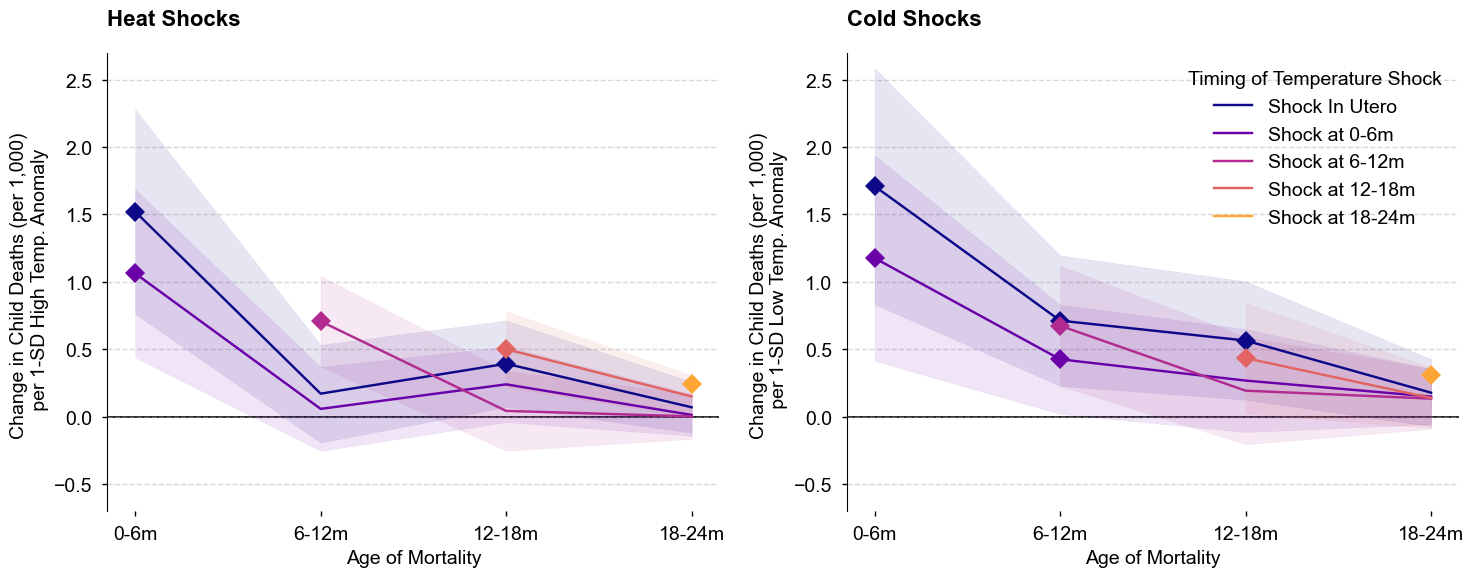

In [116]:
# Main

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\linear_dummies_true_spi1_b_avg_stdm_t semester standard_fe standard_sym_main.tex" # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
high_temp = {k : v for k,v in high_temp.items() if not "30m" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})
low_temp = {k : v for k,v in low_temp.items() if not "30m" in k}

create_coefficient_plot(
    data=high_temp,
    title='Heat Shocks',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    vmin=-.7,
    vmax=2.7,
    ax=axs[0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Cold Shocks',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    vmin=-.7,
    vmax=2.7,
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1],
    legend=True,
)

plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig 1.png", dpi=450, bbox_inches="tight")

## Por survival

C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1394741369.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


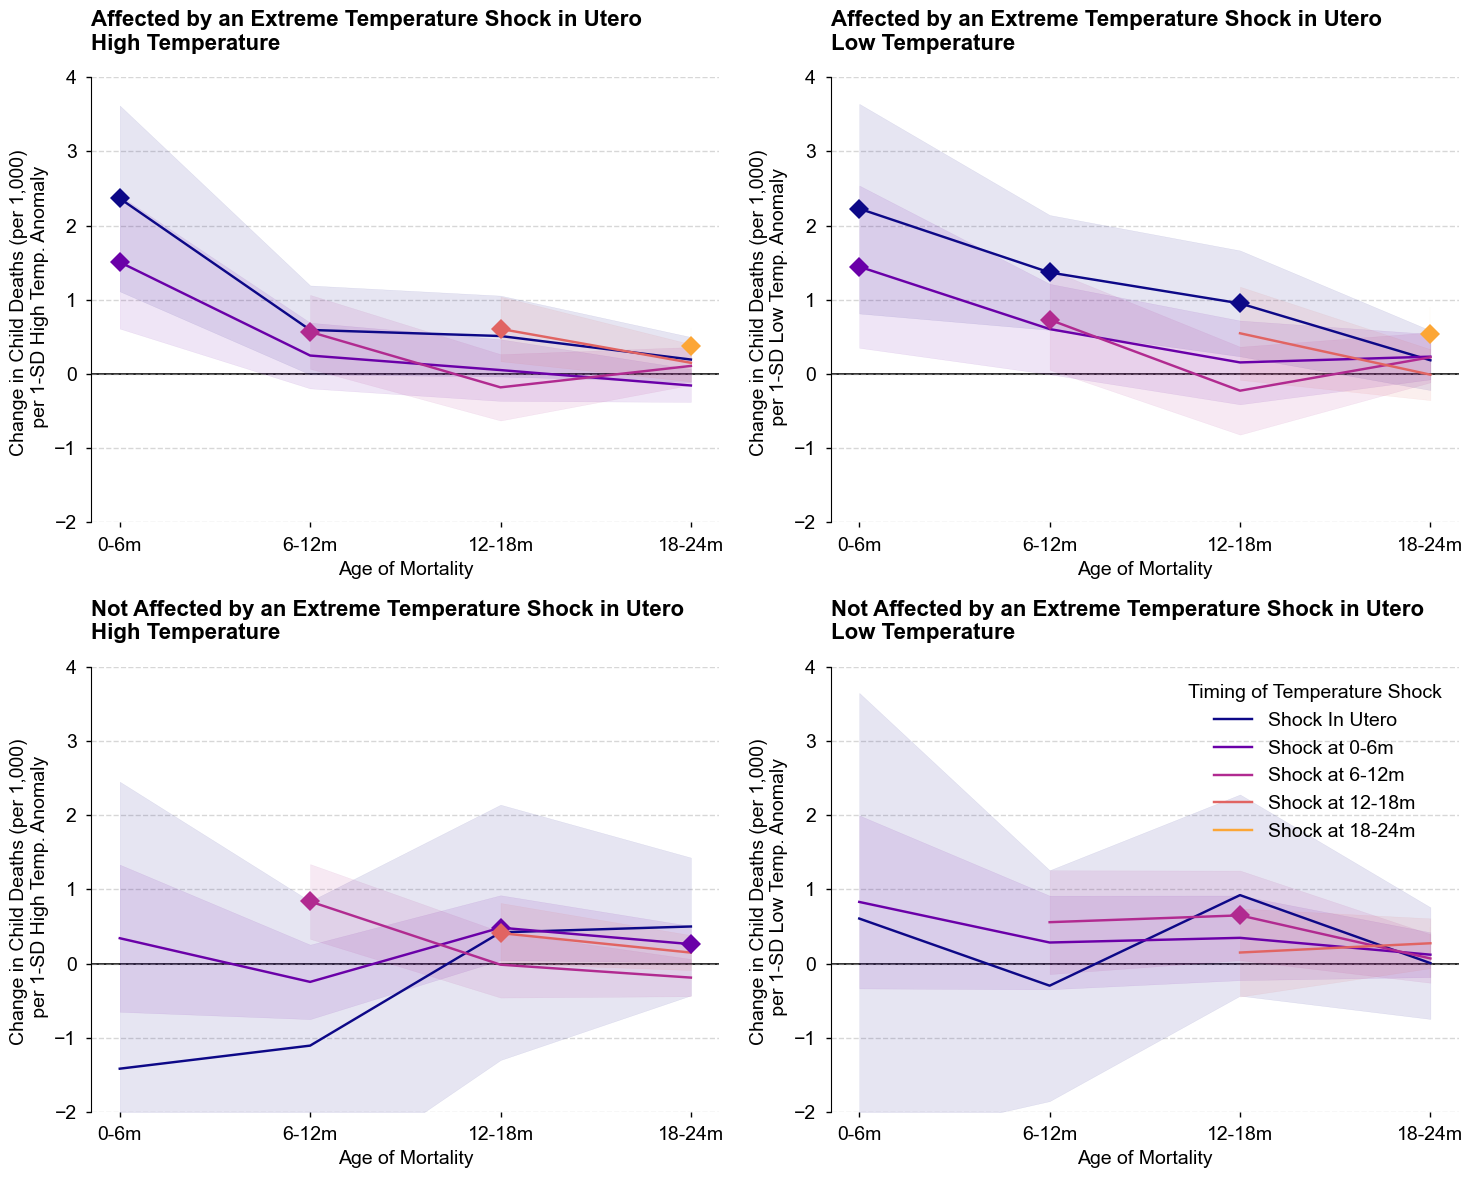

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\shock_analysis_p25p0_p75p0\linear_dummies_true_spi1_b_avg_stdm_t semester - shock_group standard_fe standard_sym.tex" # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
high_temp = {k : v for k,v in high_temp.items() if not "30m" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})
low_temp = {k : v for k,v in low_temp.items() if not "30m" in k}

create_coefficient_plot(
    data=high_temp,
    title='Affected by an Extreme Temperature Shock in Utero\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Affected by an Extreme Temperature Shock in Utero\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[0][1],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\shock_analysis_p25p0_p75p0\linear_dummies_true_spi1_b_avg_stdm_t semester - control_group standard_fe standard_sym.tex" # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
high_temp = {k : v for k,v in high_temp.items() if not "30m" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})
low_temp = {k : v for k,v in low_temp.items() if not "30m" in k}

create_coefficient_plot(
    data=high_temp,
    title='Not Affected by an Extreme Temperature Shock in Utero\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[1][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Not Affected by an Extreme Temperature Shock in Utero\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=True,
)

plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig 5 - Affected in-utero.png", dpi=450, bbox_inches="tight")

## Tipo de CLimatic band

C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1394741369.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


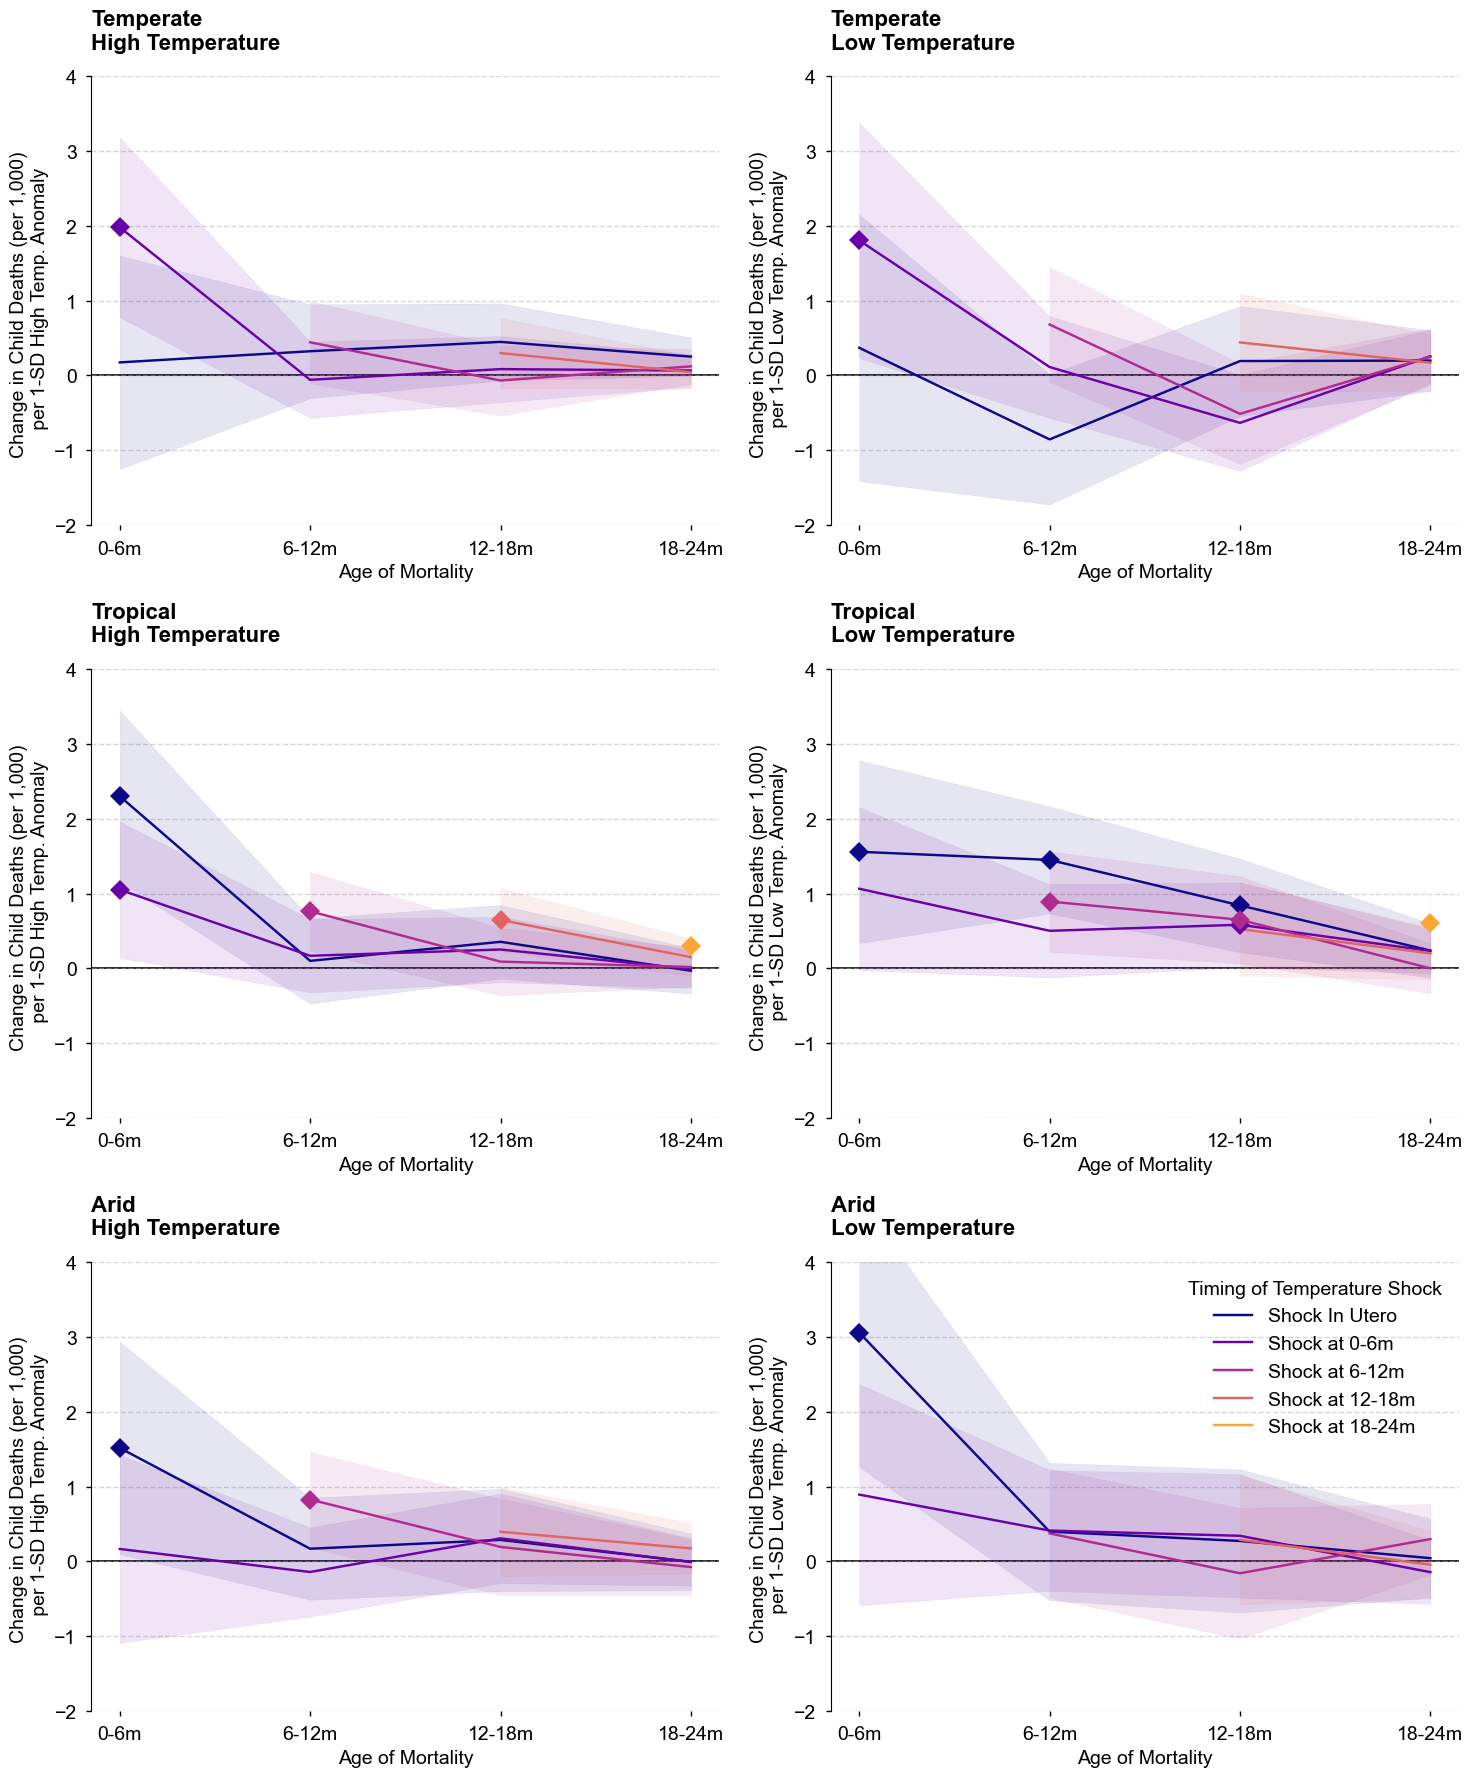

In [108]:
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\climate_band_1\linear_dummies_true_spi1_b_avg_stdm_t semester - Temperate standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Temperate\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Temperate\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[0][1],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\climate_band_1\linear_dummies_true_spi1_b_avg_stdm_t semester - Tropical standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Tropical\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[1][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Tropical\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=False,
)

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\climate_band_1\linear_dummies_true_spi1_b_avg_stdm_t semester - Arid standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Arid\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[2][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Arid\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[2][1],
    legend=True,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig Cliamte Bands.png", dpi=450, bbox_inches="tight")

## Electricidad

C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1394741369.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


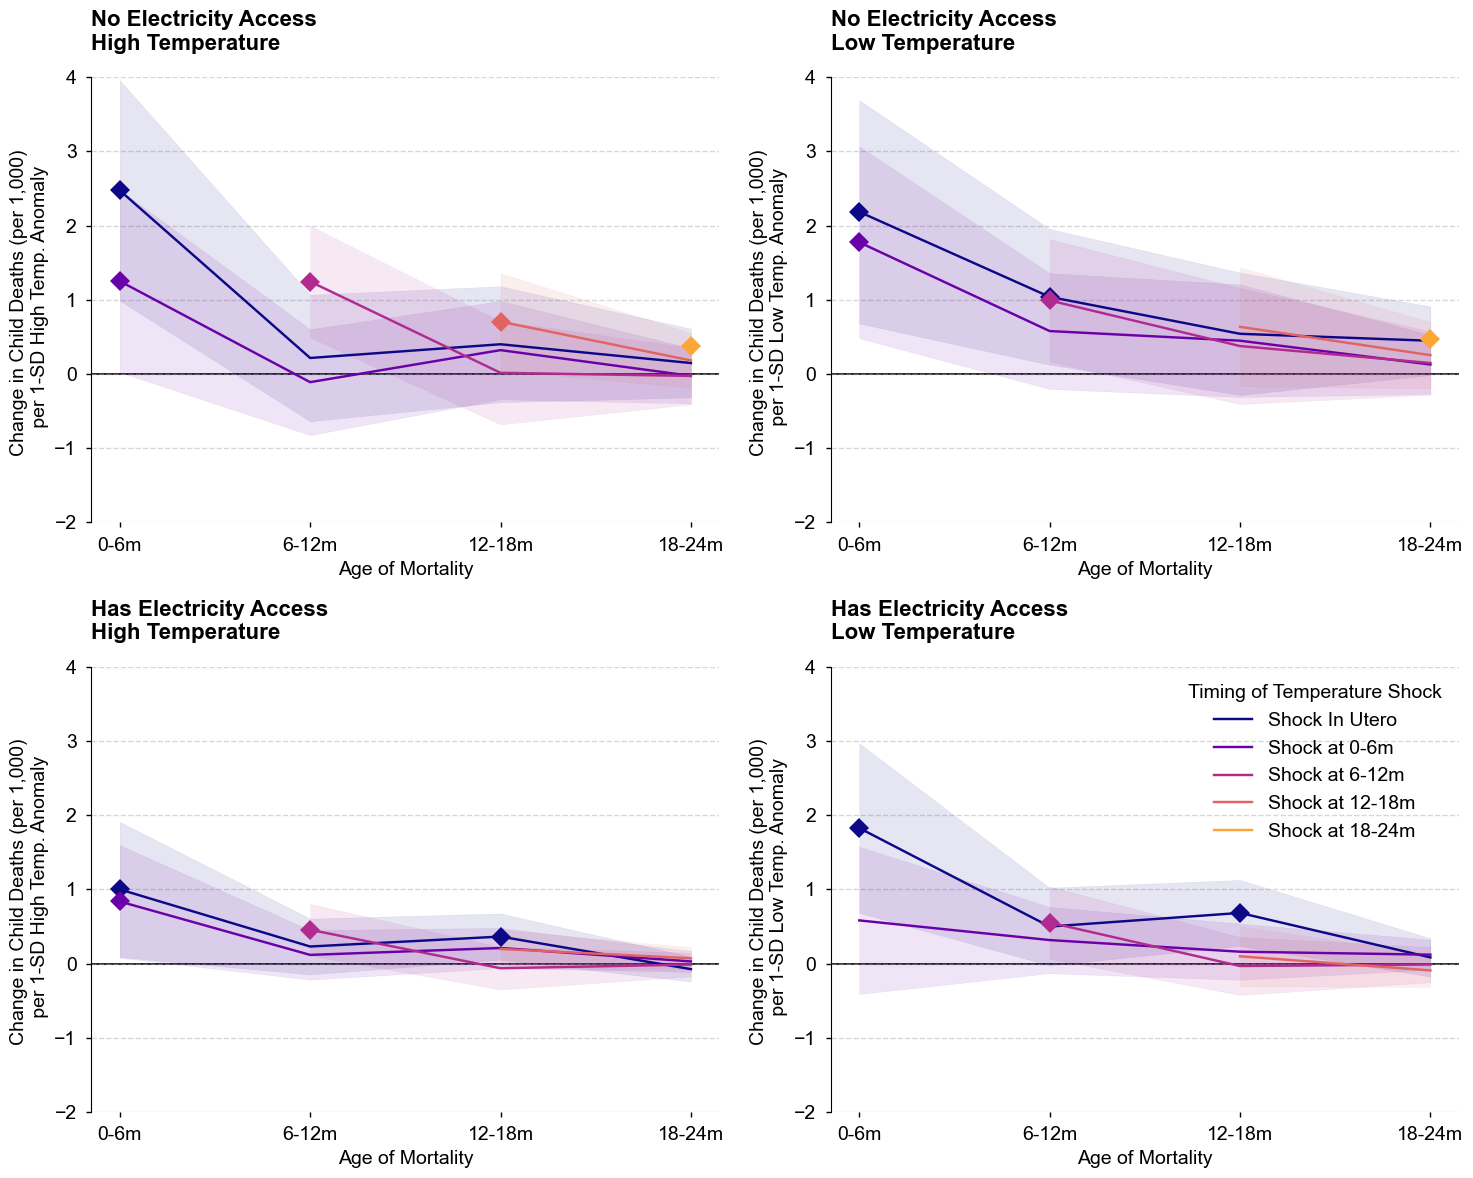

In [110]:
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.txt 
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.txt

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='No Electricity Access\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='No Electricity Access\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[0][1],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Has Electricity Access\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[1][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Has Electricity Access\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=True,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig Electricity.png", dpi=450, bbox_inches="tight")

C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1394741369.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


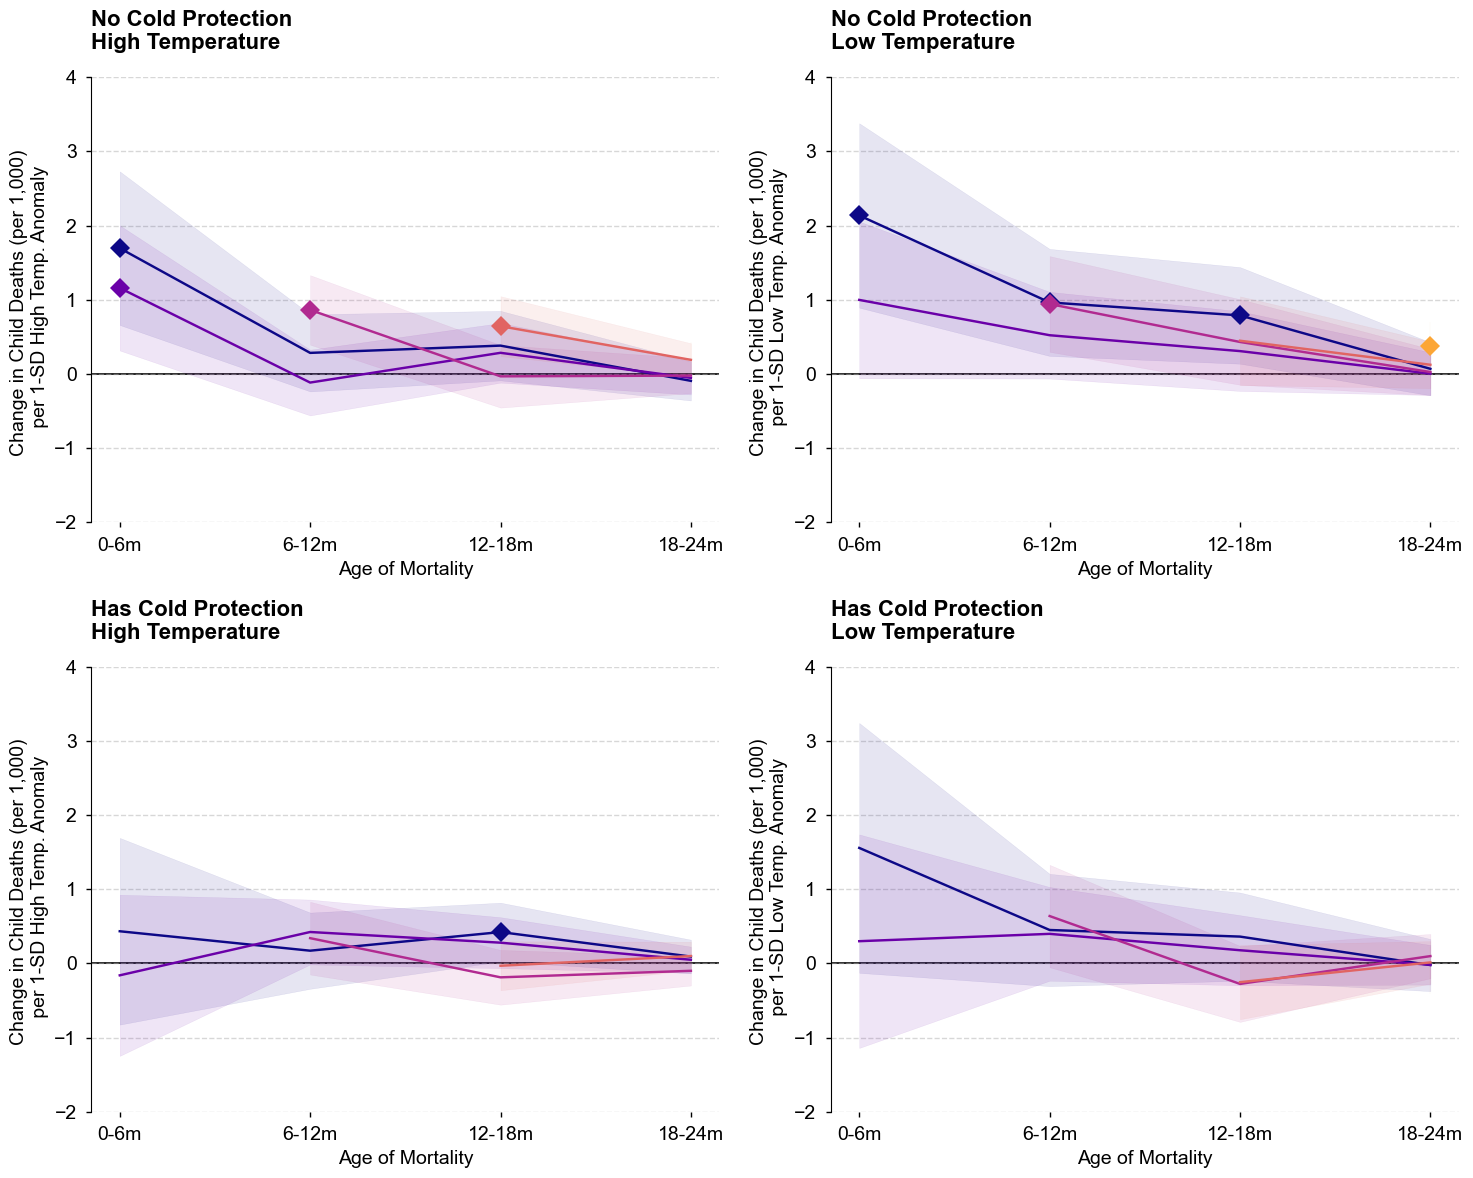

In [111]:
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.txt 
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.txt

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\high_cold_protection\linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='No Cold Protection\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='No Cold Protection\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[0][1],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\high_cold_protection\linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Has Cold Protection\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[1][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Has Cold Protection\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=False,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig High Cold Protection.png", dpi=450, bbox_inches="tight")

C:\Users\abbat\AppData\Local\Temp\ipykernel_17276\1394741369.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


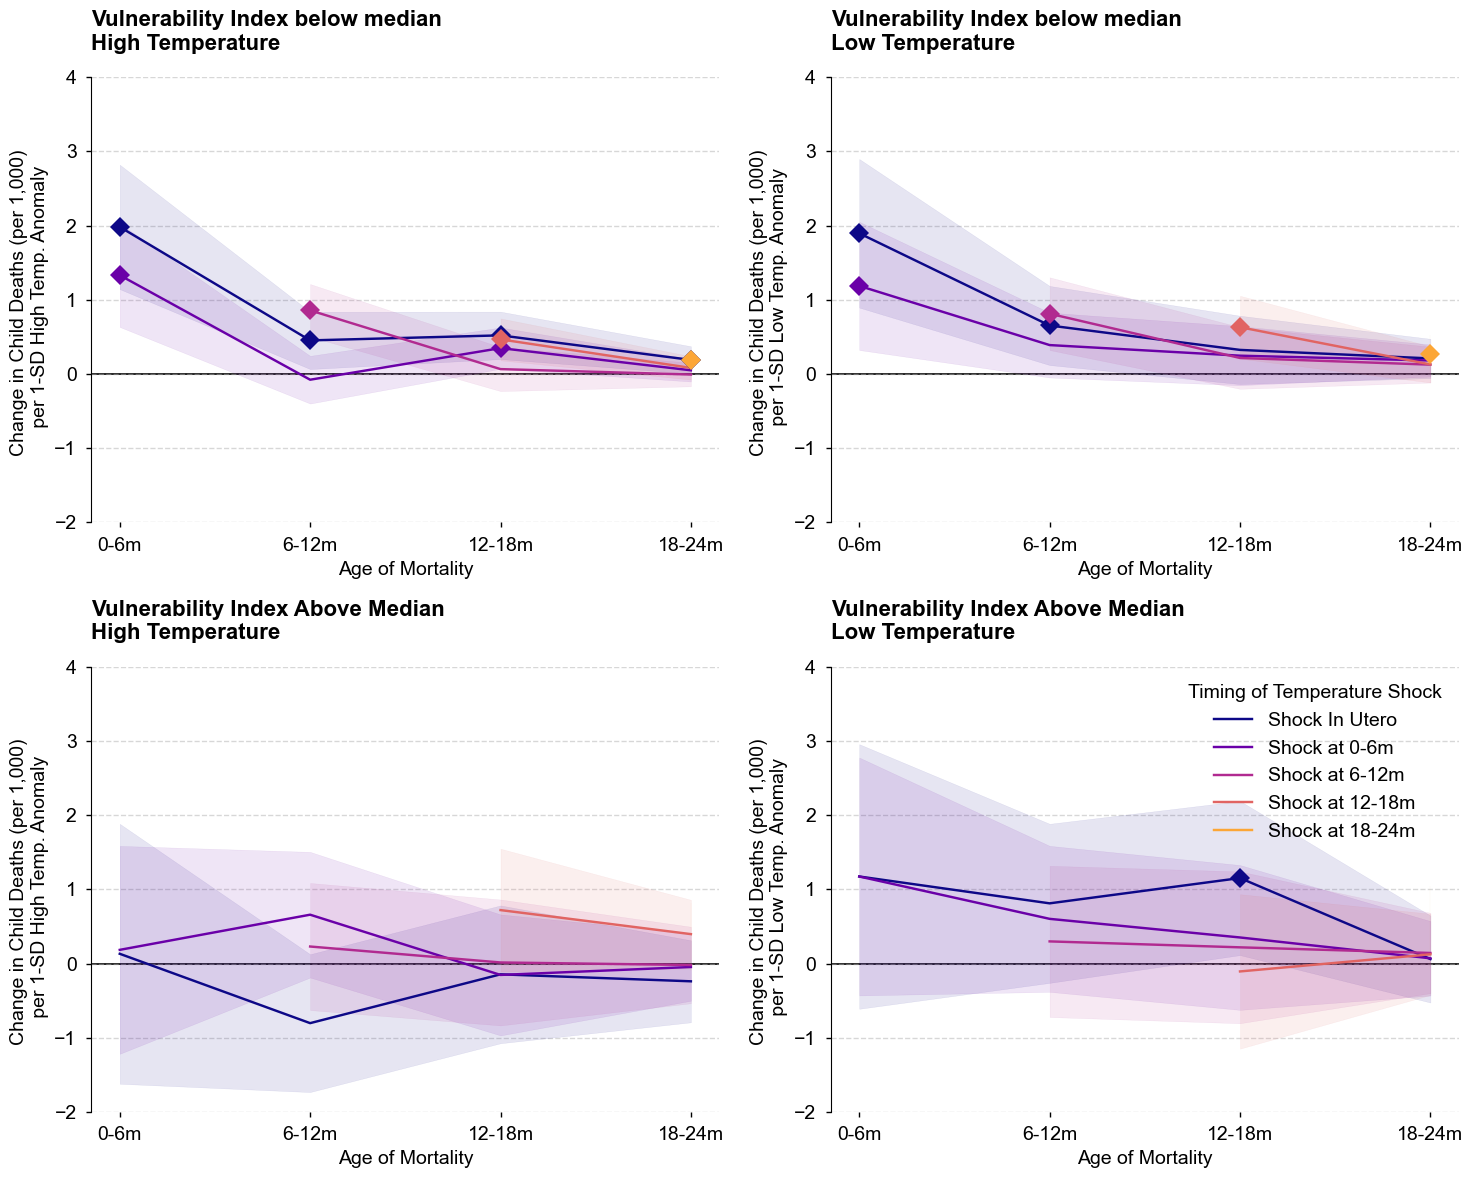

In [112]:
#### High vulnerability Index

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/high_vulnerability/linear_dummies_true_spi1_b_avg_stdm_t semester - 0 standard_fe standard_sym median.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Vulnerability Index below median\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Vulnerability Index below median\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[0][1],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/high_vulnerability/linear_dummies_true_spi1_b_avg_stdm_t semester - 1 standard_fe standard_sym median.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Vulnerability Index Above Median\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[1][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Vulnerability Index Above Median\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=True,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig high_vulnerability.png", dpi=450, bbox_inches="tight")